In [53]:
import os
import pandas as pd
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
from pytesseract import Output
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [54]:
def cv2_imread_win(img_filepath, np):
    with open(img_filepath, "rb") as stream:
        bytes = bytearray(stream.read())
        numpyarray = np.asarray(bytes, dtype=np.uint8)
        return cv2.imdecode(numpyarray, cv2.IMREAD_UNCHANGED)

In [40]:
import shutil
MYDIR = ("./images_removed_lines/")
def makedir(MYDIR):
    CHECK_FOLDER = os.path.isdir(MYDIR)

    # If folder doesn't exist, then create it.
    if not CHECK_FOLDER:
        os.makedirs(MYDIR)
        print("created folder : ", MYDIR)

    else:
        shutil.rmtree(MYDIR)
        print(MYDIR, "folder already exists and re-created")
        os.mkdir(MYDIR)

In [25]:
makedir(MYDIR)

./images_removed_lines/ folder already exists and re-created


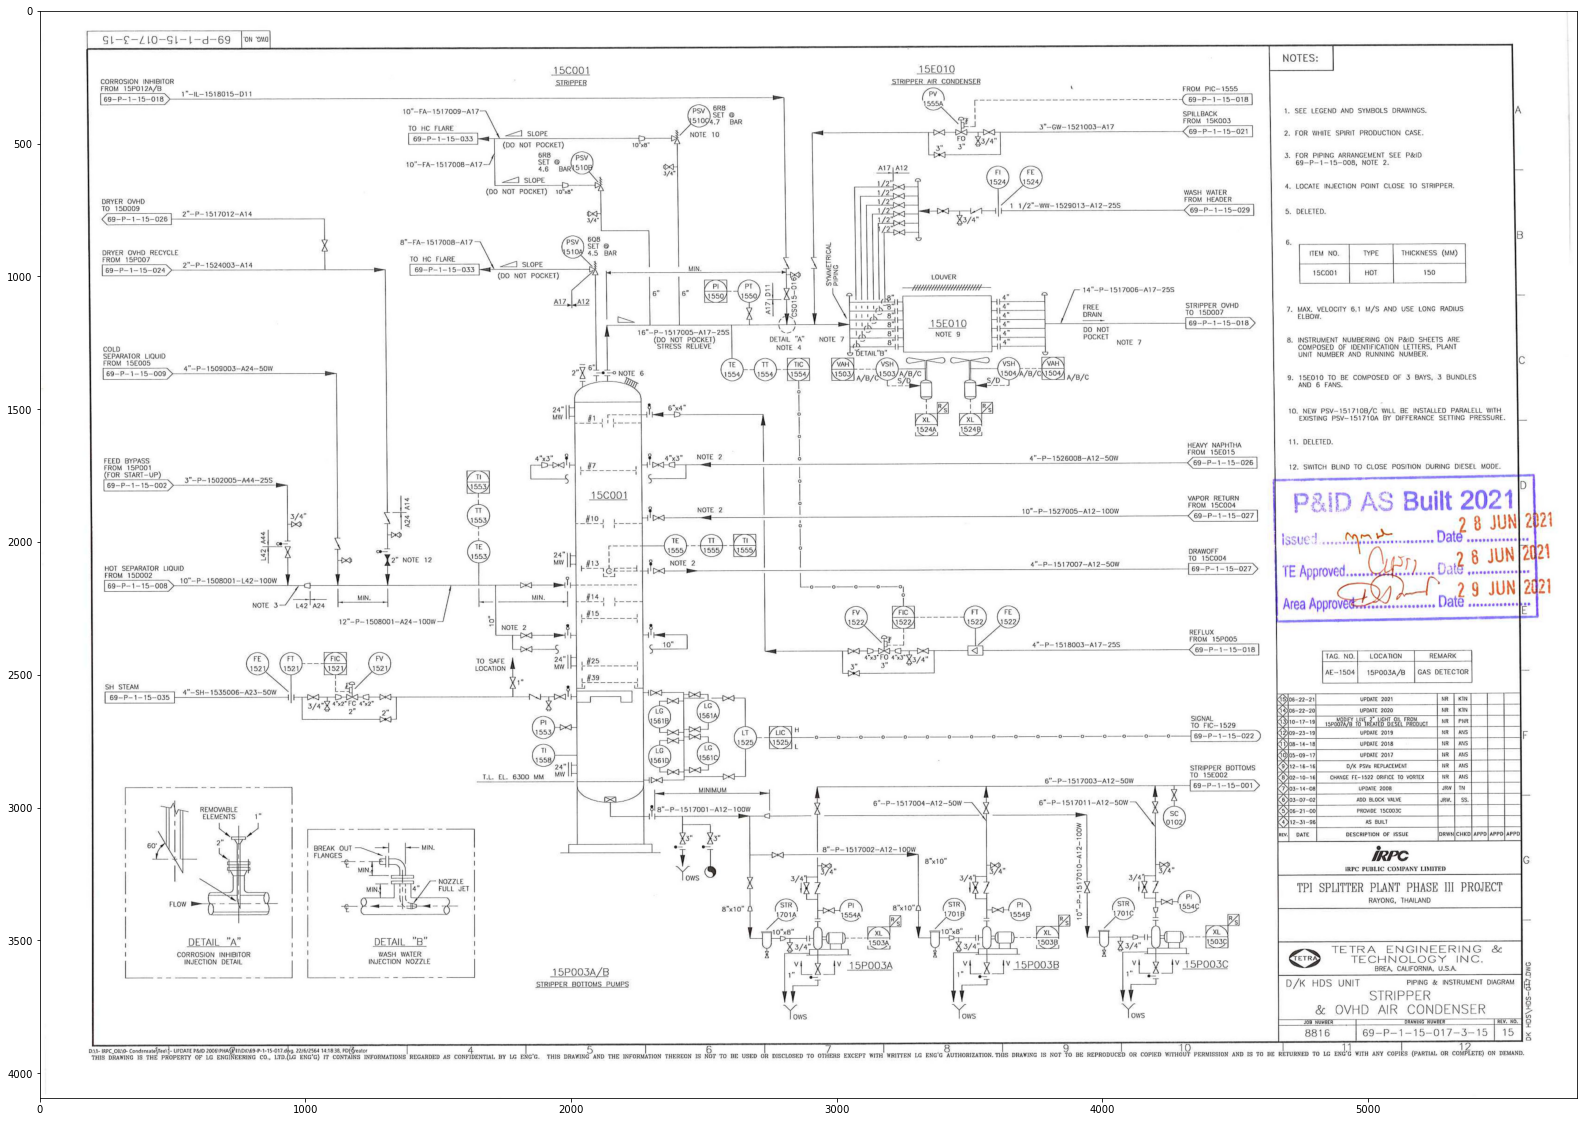

In [12]:
pid = './images/69-P-1-15-017-3-15_page1.jpg'
img = cv2.imread(pid)
plt.figure(figsize=(30,20))
plt.imshow(img);

In [13]:
# https://stackoverflow.com/questions/65039719/how-to-remove-horizontal-and-vertical-lines-without-degrading-the-image-quality
img_gry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_cny = cv2.Canny(img_gry, 50, 200)

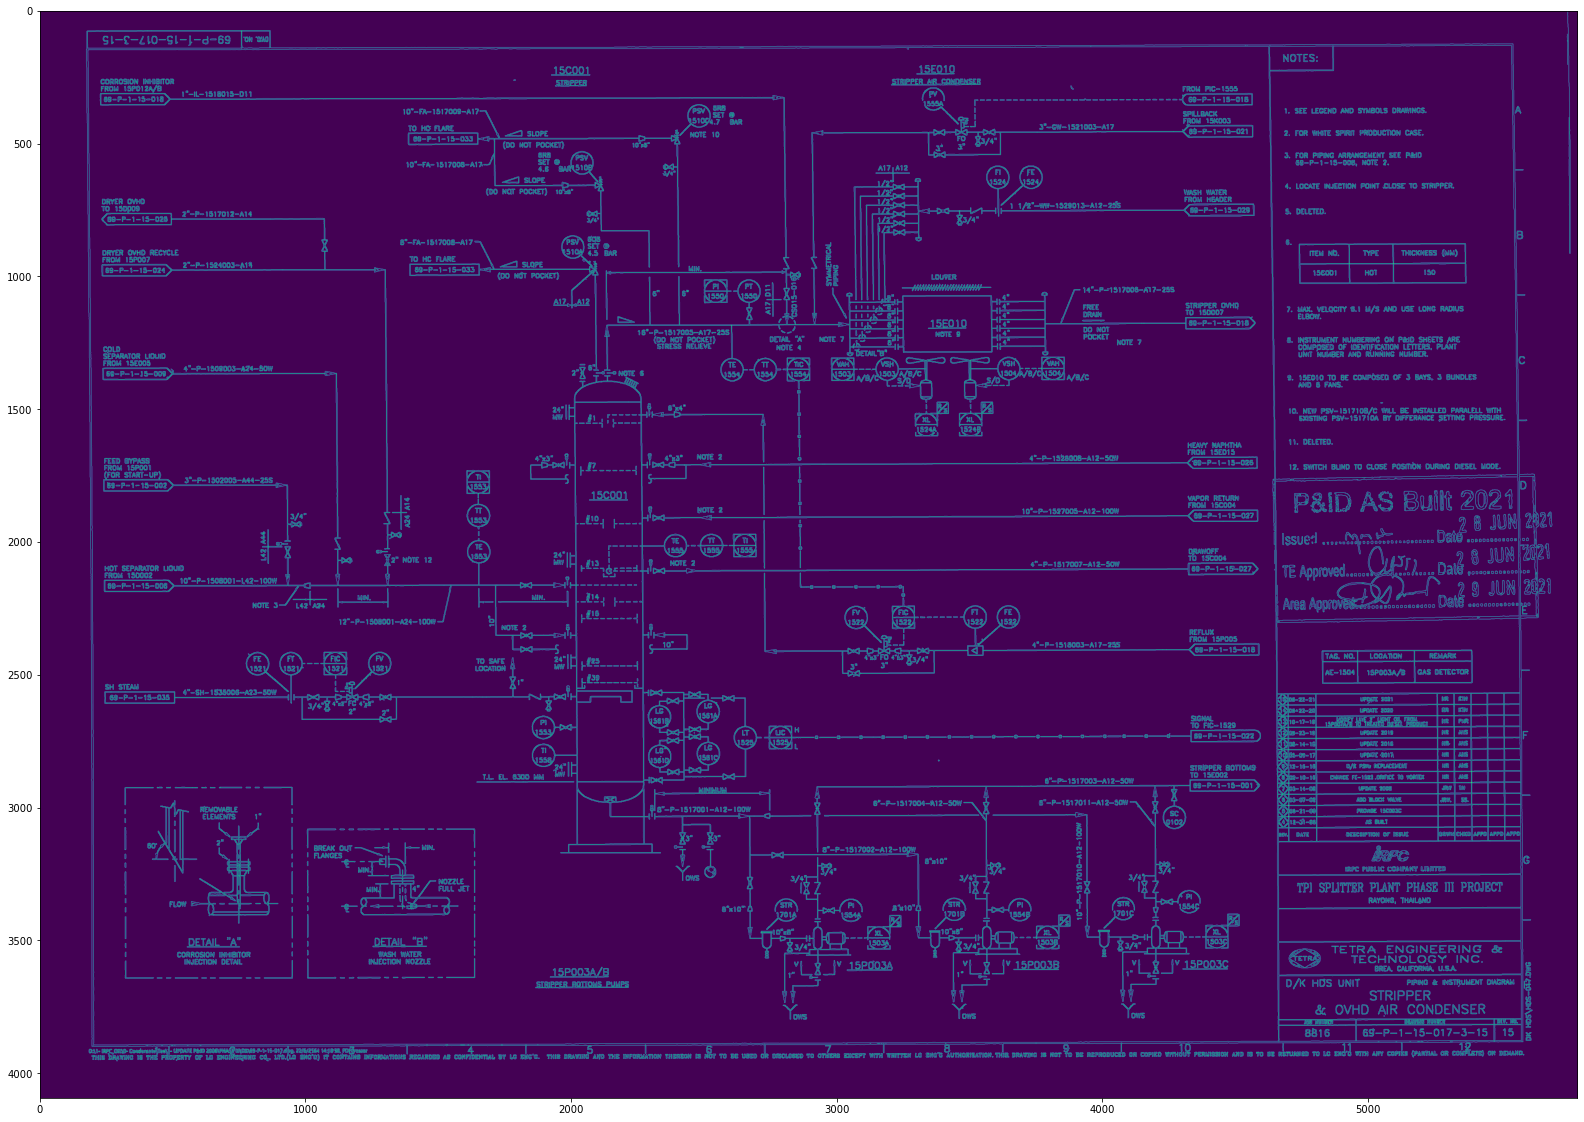

In [19]:
plt.figure(figsize=(30,20))
plt.imshow(img_cny)

In [20]:
lns = cv2.ximgproc.createFastLineDetector().detect(img_cny)

img_cpy = img.copy()

for ln in lns:
    x1 = int(ln[0][0])
    y1 = int(ln[0][1])
    x2 = int(ln[0][2])
    y2 = int(ln[0][3])

    cv2.line(img_cpy, pt1=(x1, y1), pt2=(x2, y2),
             color=(0, 255, 0), thickness=5)

    print("Coords: ({}, {})->({}, {})".format(x1, y1, x2, y2))

AttributeError: module 'cv2' has no attribute 'ximgproc'

In [72]:
# https://stackoverflow.com/questions/42461211/how-to-remove-horizontal-and-vertical-lines-from-an-image
#cpp code converted from     http://docs.opencv.org/3.2.0/d1/dee/tutorial_moprh_lines_detection.html

import cv2
import numpy as np
pid = './images/69-P-1-15-017-3-15_page1.jpg'
MYDIR = ("./images_removed_lines/")
img = cv2.imread(pid)
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

img = cv2.bitwise_not(img)
th2 = cv2.adaptiveThreshold(img,255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,-2)
cv2.imshow("th2", th2)
cv2.imwrite("th2.jpg", th2)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [73]:
horizontal = th2
vertical = th2
rows,cols = horizontal.shape
horizontalsize = int(cols / 30)
horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontalsize,1))
horizontal = cv2.erode(horizontal, horizontalStructure, (-1, -1))
horizontal = cv2.dilate(horizontal, horizontalStructure, (-1, -1))
# cv2.imshow("horizontal", horizontal)
# cv2.imwrite(MYDIR+"horizontal.jpg", horizontal)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [74]:
verticalsize = int(rows / 30)
verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, verticalsize))
vertical = cv2.erode(vertical, verticalStructure, (-1, -1))
vertical = cv2.dilate(vertical, verticalStructure, (-1, -1))
# cv2.imshow("vertical", vertical)
# cv2.imwrite("vertical.jpg", vertical)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

vertical = cv2.bitwise_not(vertical)
# cv2.imshow("vertical_bitwise_not", vertical)
# cv2.imwrite(MYDIR+"vertical_bitwise_not.jpg", vertical)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

#step1
edges = cv2.adaptiveThreshold(vertical,255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,-2)
# cv2.imshow("edges", edges)
# cv2.imwrite(MYDIR+"edges.jpg", edges)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

#step2
kernel = np.ones((2, 2), dtype = "uint8")
dilated = cv2.dilate(edges, kernel)
# cv2.imshow("dilated", dilated)
# cv2.imwrite(MYDIR+"dilated.jpg", dilated)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# step3
smooth = vertical.copy()

#step 4
smooth = cv2.blur(smooth, (4,4))
# cv2.imshow("smooth", smooth)
# cv2.imwrite(MYDIR+"smooth.jpg", smooth)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

#step 5
(rows, cols) = np.where(img == 0)
vertical[rows, cols] = smooth[rows, cols]

# cv2.imshow("vertical_final", vertical)
# cv2.imwrite(MYDIR+"vertical_final.jpg", vertical)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [75]:
#inverse the image, so that lines are black for masking
horizontal_inv = cv2.bitwise_not(horizontal)
#perform bitwise_and to mask the lines with provided mask
masked_img = cv2.bitwise_and(img, img, mask=horizontal_inv)
#reverse the image back to normal
masked_img_inv = cv2.bitwise_not(masked_img)
# cv2.imshow("masked img", masked_img_inv)
# # cv2.imwrite(MYDIR+"result2.jpg", masked_img_inv)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [76]:
#inverse the image, so that lines are black for masking
vertical_inv = vertical
#perform bitwise_and to mask the lines with provided mask
masked_img = cv2.bitwise_and(masked_img, masked_img, mask=vertical_inv)
#reverse the image back to normal
masked_img_inv = cv2.bitwise_not(masked_img)
plt.imsave(MYDIR+"result3.jpg", masked_img_inv, cmap="gray")
# cv2.imshow("masked img", masked_img_inv)
# cv2.imwrite(MYDIR+"result3.jpg", masked_img_inv)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

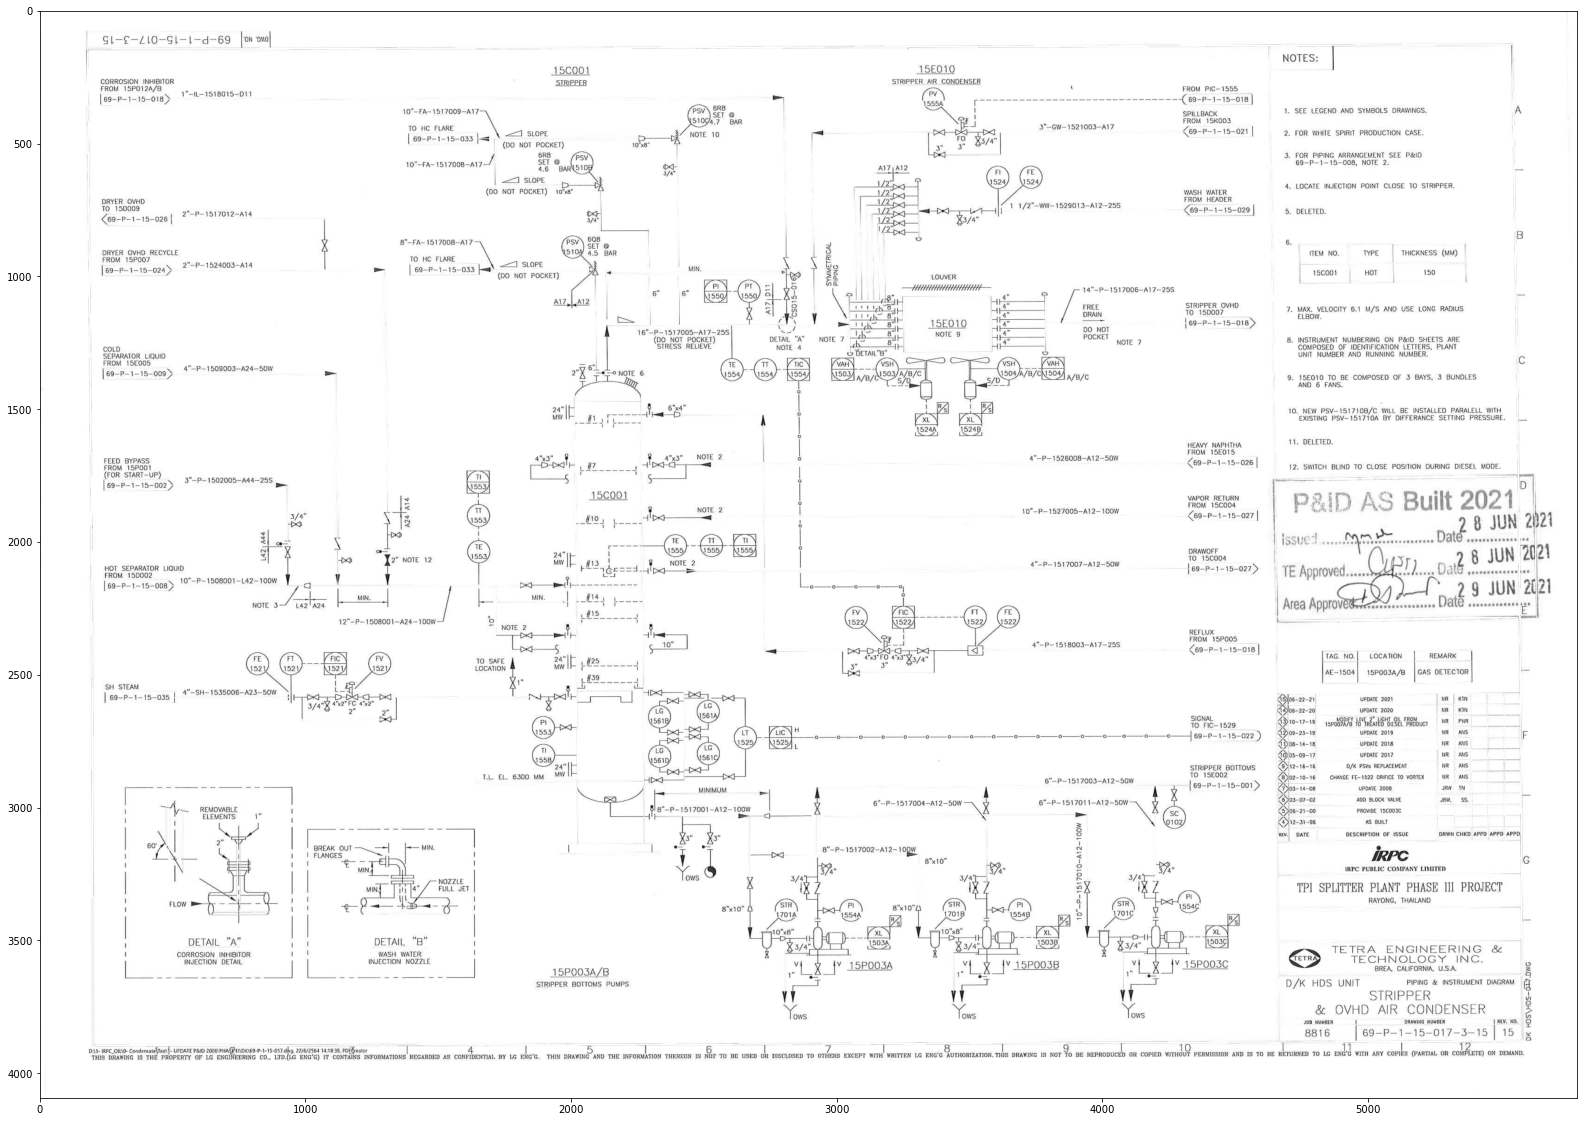

In [79]:
plt.figure(figsize=(30,20))
plt.imshow(masked_img_inv, cmap="gray")

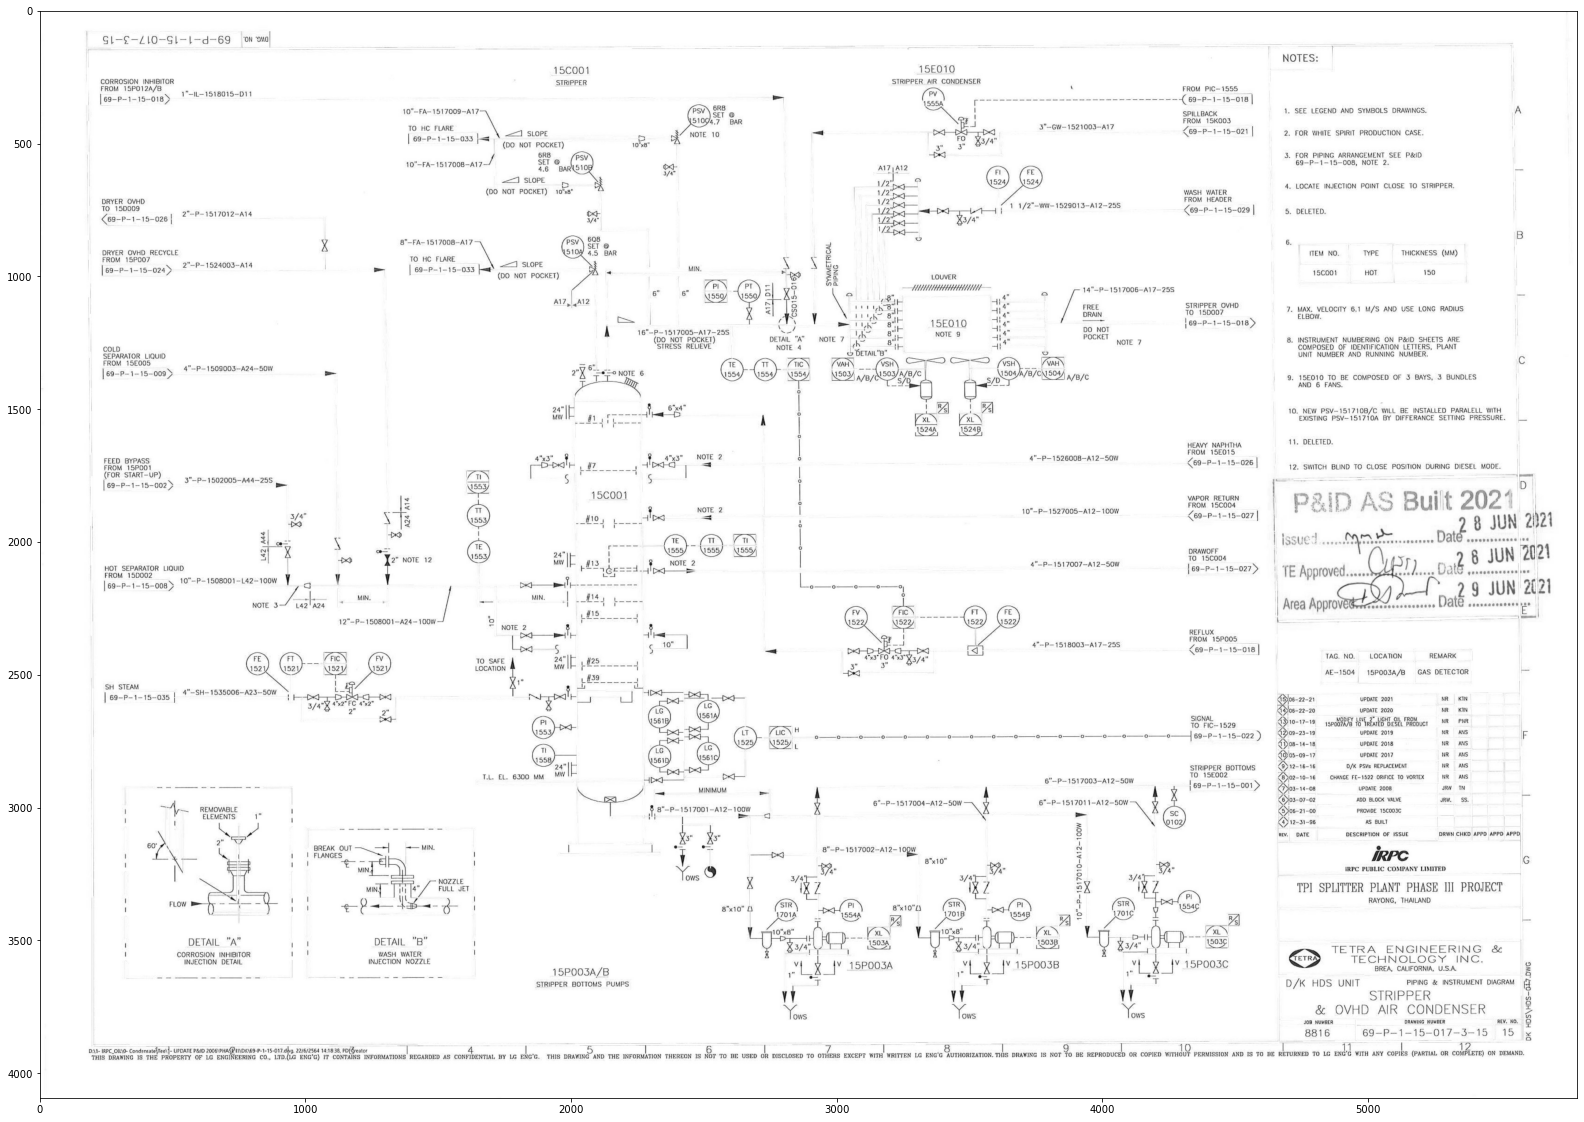

In [63]:
img = cv2.imread(MYDIR+'result3.jpg')
plt.figure(figsize=(30,20))
plt.imshow(img)

In [80]:
# https://stackoverflow.com/a/43185606
# https://diewland.medium.com/python-cv2-%E0%B9%83%E0%B8%99-windows-%E0%B8%AD%E0%B9%88%E0%B8%B2%E0%B8%99%E0%B9%84%E0%B8%9F%E0%B8%A5%E0%B9%8C%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B9%84%E0%B8%97%E0%B8%A2%E0%B9%84%E0%B8%A1%E0%B9%88%E0%B9%84%E0%B8%94%E0%B9%89-f688a4747070
import numpy as np
import cv2
def cv2_imread_win(img_filepath, np):
    with open(img_filepath, "rb") as stream:
        bytes = bytearray(stream.read())
        numpyarray = np.asarray(bytes, dtype=np.uint8)
        return cv2.imdecode(numpyarray, cv2.IMREAD_UNCHANGED)

In [81]:
def create_rectangle_dataframe(image,file,marked_folder):
#     img0 = cv2.imread(image)
    img0 = cv2_imread_win(image,np)
    # img0 = cv2.bitwise_not(img0)
    img = img0.copy()
    df = pd.DataFrame()
    d = pytesseract.image_to_data(img, output_type=Output.DICT, config='--psm 12')
    n_boxes = len(d['level'])
    k = 0
    for i in range(n_boxes):
        l = []
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    #     text = d['text'][i]
        text = d['text'][i].replace('—','-').replace('~','-')
        if len(text.strip())>5 :
            k = k+1
            l = pd.Series([file, k, text, x, y, x+w, y+h])
            df = df.append(l,ignore_index=True)
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(img, '['+str(k)+']'+text, (x, y - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
    #         print(i,l.tolist())
#     plt.imshow(img)
#     plt.imsave('box_in_circle.jpg',img)
#     plt.imsave(f'.\\data_and_imagesmarked\\{file}',img)
    plt.imsave(marked_folder+file,img)
    return(df)
        #     print(text, x, y, x+w, y+h)

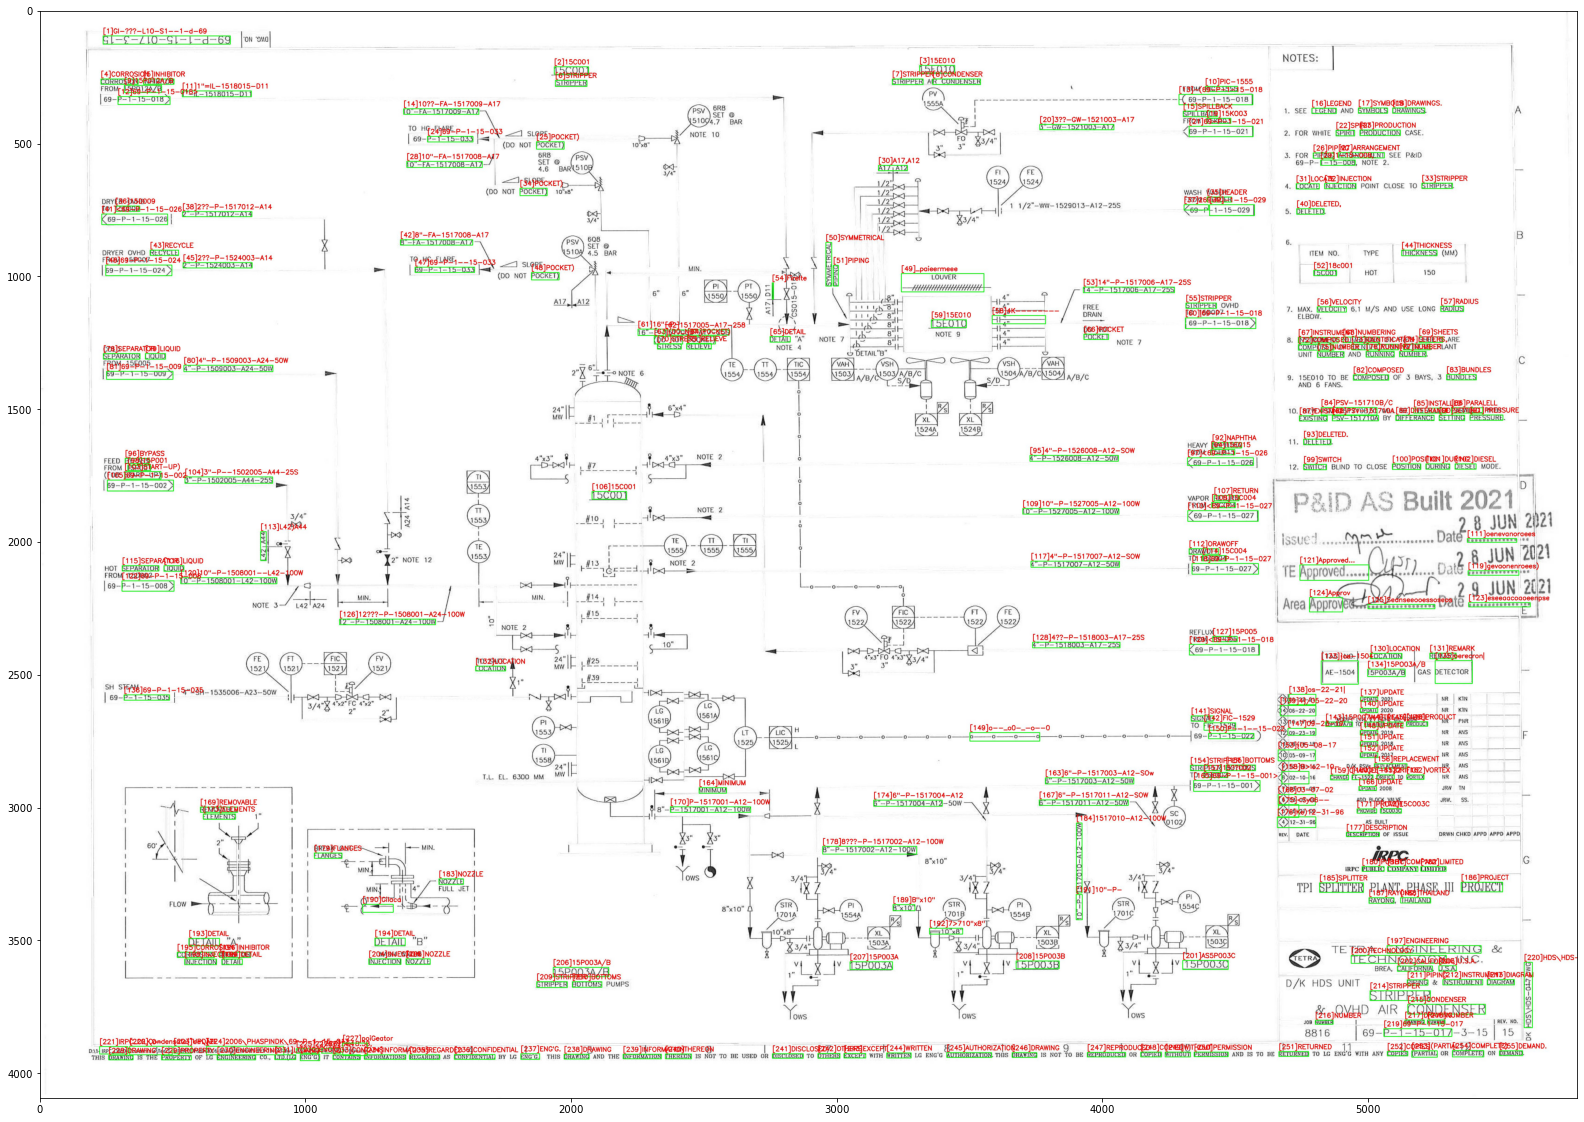

In [82]:
image = './images_removed_lines/result3.jpg'
# image = pid
file = 'result3_1.jpg'
marked_folder = './images_removed_lines/'
create_rectangle_dataframe(image,file,marked_folder)
img1 = cv2.imread(marked_folder+file)
plt.figure(figsize=(30,20))
plt.imshow(img1[:,:,::-1])

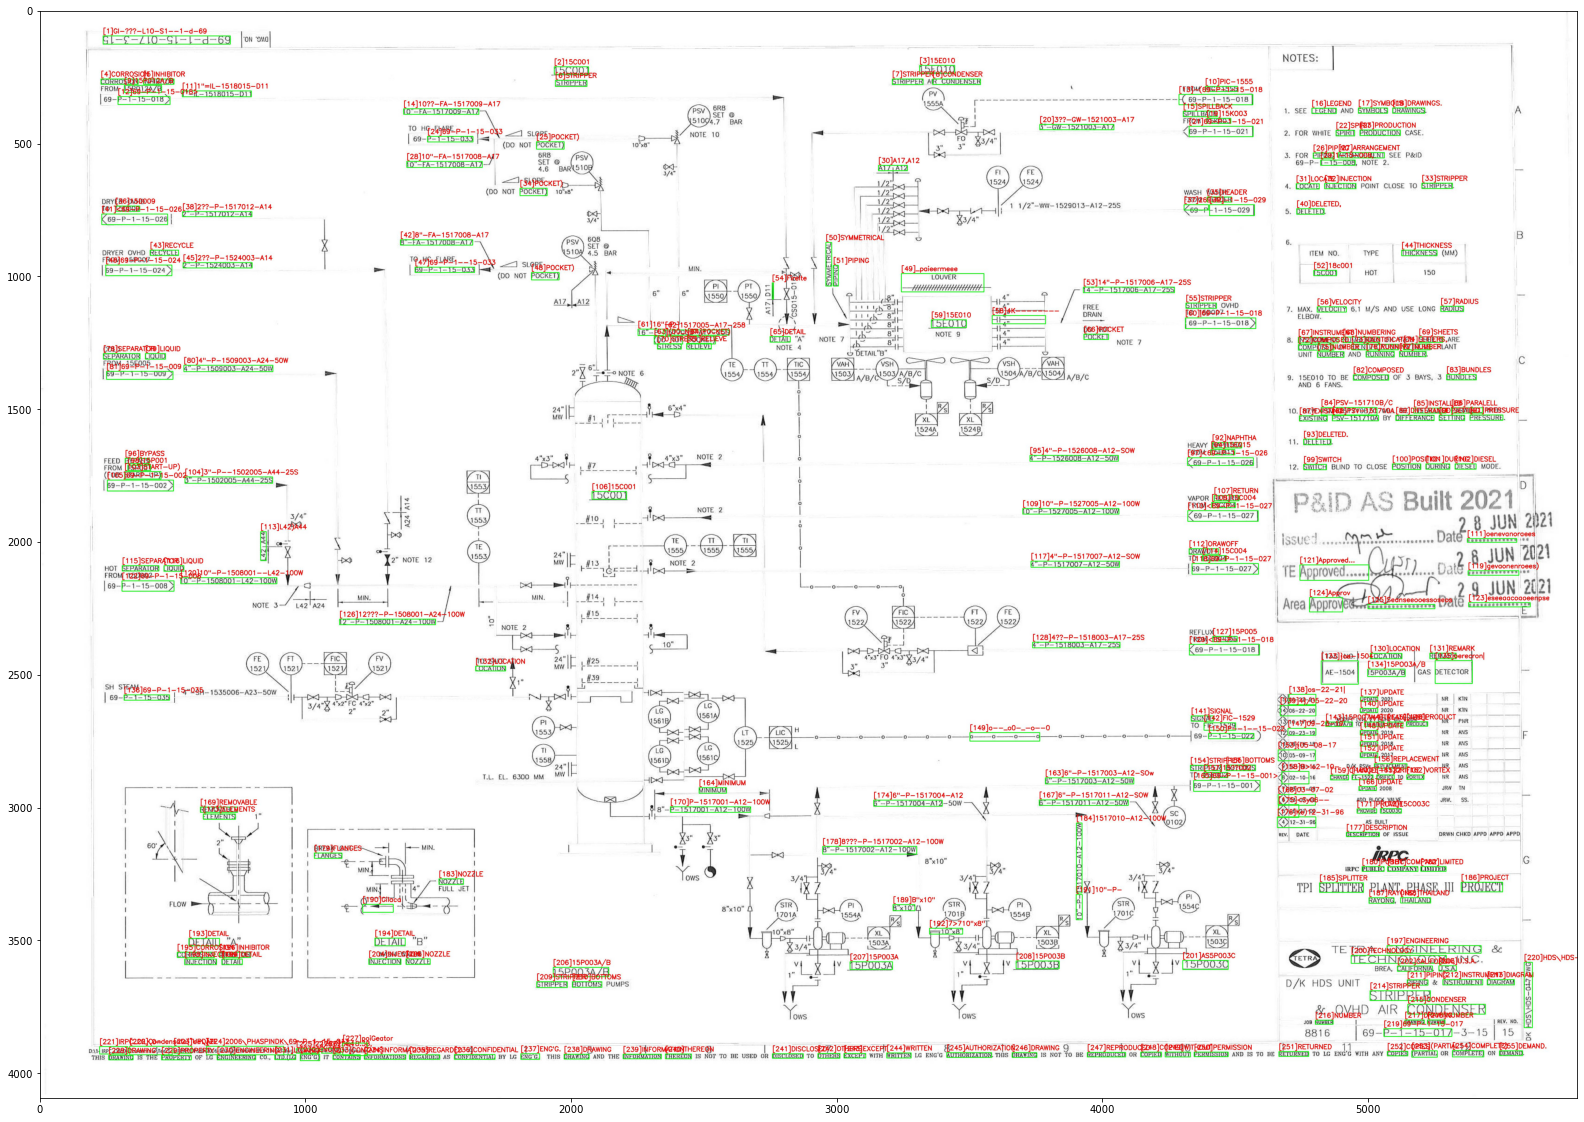

In [83]:
img = cv2.imread(marked_folder+'result3_1.jpg')
img1 = img[:,:,::-1]
plt.figure(figsize=(30,20))
plt.imshow(img1)